<h1 align=center><font size = 10> Classification with Python</font></h1>

In this notebook, we try to practice all the classification algorithms that we have learned in this course.

We load a dataset using the Pandas library, and apply the following algorithms, and find the best one for this specific dataset by accuracy evaluation methods.

Lets first load required libraries:

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn import preprocessing
%matplotlib inline
%load_ext autotime


# Mandatory part (85%  of the total score)

## About dataset

The Pima is a group of Native Americans living in Arizona. A genetic predisposition allowed this group to survive normally to a diet poor of carbohydrates for years. In recent years, a sudden shift from traditional agricultural crops to processed foods, together with a decline in physical activity, has made them develop the highest prevalence of type 2 diabetes and for this reason, they have been subject of many studies.

The dataset includes data from 768 women with 8 characteristics, in particular:

- Number of times pregnant
- Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mm Hg)
- Triceps skinfold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)
- The last column of the dataset indicates if the person has been diagnosed with diabetes (1) or not (0)

## The problem:

The type of dataset and problem is a classic supervised binary classification. Given a number of elements with certain characteristics (features), we want to build a machine learning model to identify people affected by type 2 diabetes.

To solve the problem we will have to analyze the data, do any required transformation and nomarlization, apply a machine learning algorithm, train a model, check the performance of the trained model and iterate with other algorithms until we find the most performant for our type of dataset.

## Load Data From CSV File  

### 1. Load the dataset from the 'pima-indians-diabetes.csv' file.

Because the CSV doesn't contain any header, we add column names using the description from the original dataset website:

dataset.columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]

In [2]:
#TO DO:
columns = ["NumTimesPrg", "PlGlcConc", "BloodP", "SkinThick", "TwoHourSerIns", "BMI", "DiPedFunc", "Age", "HasDiabetes"]
df = pd.read_csv('pima-indians-diabetes.csv', names=columns)


time: 40.9 ms


## Inspect the Dataset

### 2. Print out the shape of the dataset: we have 768 rows and 9 columns. Then, print out the head of the dataset to better understand the data format.

The first 8 columns are features while the last one is the supervised label (1 = has diabetes, 0 = no diabetes)

In [3]:
#TO DO:
print(df.shape)
df.head()


(768, 9)


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


time: 14 ms


# Data visualization and pre-processing



## Data correlation matrix
### 3. Let's calculate the correlation matrix for our dataset.

The correlation matrix is an important tool to understand the correlation between the different characteristics. The values range from -1 to 1 and the closer a value is to 1 the better correlation there is between two characteristics. 

In [4]:
#TO DO:
corr = df.corr()
corr


,NumTimesPrg,PlGlcConc,BloodP,SkinThick,TwoHourSerIns,BMI,DiPedFunc,Age,HasDiabetes
NumTimesPrg,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
PlGlcConc,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodP,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThick,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
TwoHourSerIns,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiPedFunc,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
HasDiabetes,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


time: 12.9 ms


### 4. Render the corr matrix using the heatmap in seaborn.

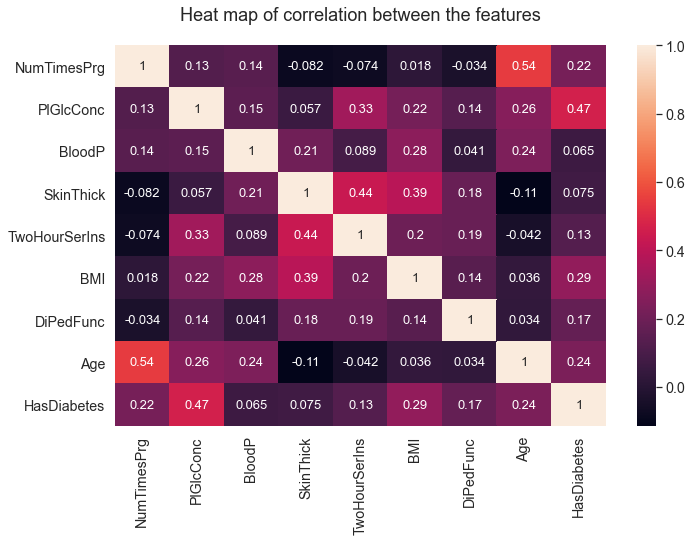

time: 679 ms


In [5]:
#TO DO:
import seaborn as sns

sns.set(font_scale=1.3, style='dark')
fig, axes = plt.subplots(1, 1, figsize=(11,7))
sns.heatmap(corr, annot=True, annot_kws={'fontsize': 13});
plt.title('Heat map of correlation between the features', fontsize=18, y=1.05);


### 5. Print out the column which has the biggest corr number with 'HasDiabetes'.

In [6]:
list_corr = corr['HasDiabetes'].drop('HasDiabetes')
biggest_corr_column_name = list_corr.idxmax()
df[biggest_corr_column_name]


0      148
1       85
2      183
3       89
4      137
      ... 
763    101
764    122
765    121
766    126
767     93
Name: PlGlcConc, Length: 768, dtype: int64

time: 4.51 ms


## Visualize the Dataset
Visualizing the data is an important step of the data analysis. With a graphical visualization of the data, we have a better understanding of the various features values distribution: for example, we can understand the average age of the people or the average BMI, etc...

We could, of course, limit our inspection to the table visualization, but we could miss important things that may affect our model precision.
### 6. Manipulate histogram to represent all data columns in the dataset.

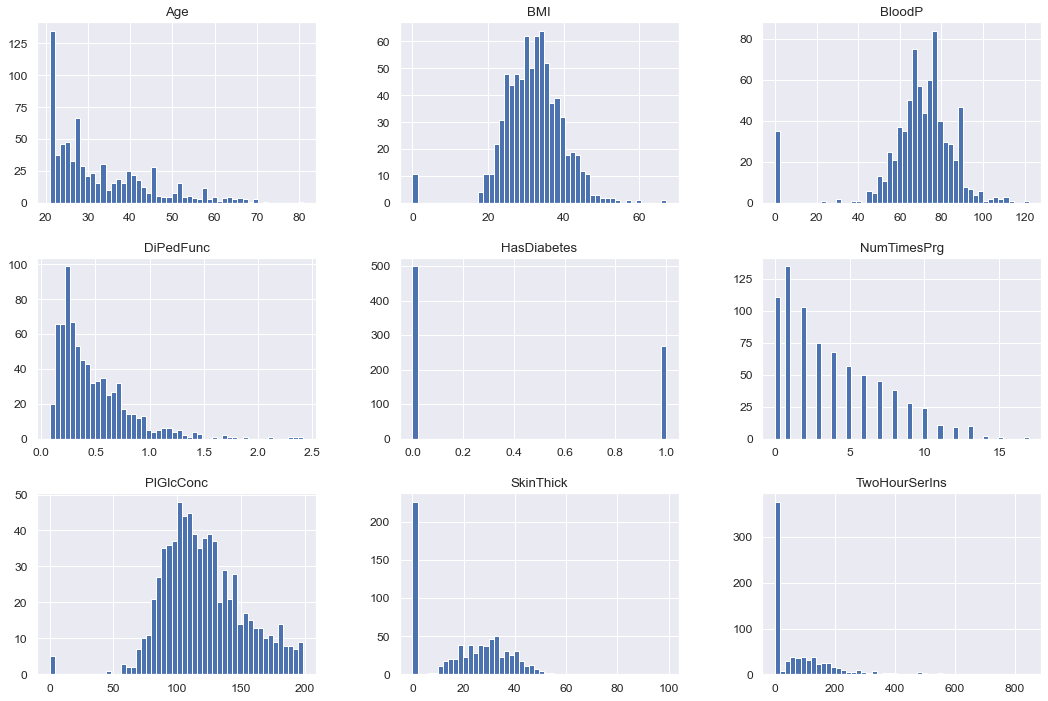

time: 1.84 s


In [7]:
#TO DO:
sns.set(font_scale=1.1, style='dark')
df.hist(bins=50, figsize=(18,12));


An important thing I notice in the dataset (and that wasn't obvious at the beginning) is the fact that some people have null (zero) values for some of the features: it's not quite possible to have 0 for BMI or the blood pressure.

How can we deal with similar values? We will see it later during the data transformation phase.

## Data cleaning and transformation

We have noticed from the previous analysis that some patients have missing data for some of the features. Machine learning algorithms don't work very well when the data are missing so we have to find a solution to "clean" the data we have.

The easiest option could be to eliminate all those patients with null/zero values, but in this way, we would eliminate a lot of important data.

Another option is to calculate the median value for a specific column and substitute that value everywhere (in the same column) we have zero or null. Let's see how to apply this second method.

### 7. Interpolate missing values on ['BMI', 'BloodP', 'PlGlcConc', 'SkinThick',  'TwoHourSerIns'] using median values or any other way which is effective.

We haven't transformed all the columns, because of some values which can make sense to be zero (like "Number of times pregnant").

- Ta tiến hành nội suy dữ liệu bị thiếu theo phương pháp sau: Các giá trị bị thiếu của một cột được tính dựa trên các giá trị của cột có hệ số tương quan cao nhất với cột đó thông qua công thức hồi quy tuyến tính. Các bước bao gồm:
    - Bước 1: Tạm thời loại bỏ những giá trị sai hoặc bị thiếu
    - Bước 2: Lọc dữ liệu nếu cần thiết
    - Bước 3: Xây dựng công thức hồi quy giữa cột cần xử lý và cột có hệ số tương quan cao nhất với nó
    - Bước 4: Tính giá trị bị thiếu dựa trên công thức hồi quy 
    

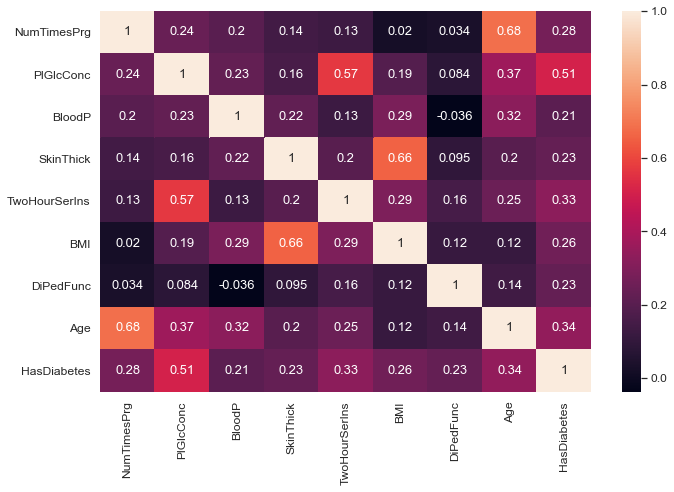

time: 541 ms


In [8]:
# Bước 1&2:
import seaborn as sns
from filter_outlier import filter_outlier_value_range
df_filter = df.query('BMI!=0 & BloodP!=0 & PlGlcConc!=0 & SkinThick!=0 & TwoHourSerIns!=0')
df_filter = filter_outlier_value_range(df_filter, filter_columns=['BMI', 'BloodP', 'PlGlcConc', 'SkinThick', 'TwoHourSerIns'])
fig, axes = plt.subplots(1, 1, figsize=(11,7))
sns.heatmap(df_filter.corr(), annot=True, annot_kws={'fontsize': 13});


- <span style="color:blue"> Nhận xét:
    - So sánh với bảng tương quan ban đầu ta thấy các giá trị thay đổi khá nhiều, rõ ràng là các giá trị bị sai gây ra sự khác biệt này 

- Tạo hàm xử lý tự động bước 3 và 4

In [9]:
def Handle_missing_value(df, df_filter, column_1=None, column_2=None):
    # Bước 3: Xây dựng công thức hồi quy tuyến tính
    coeff = np.polyfit(df_filter[column_1], df_filter[column_2], deg=1)
    trendline = np.poly1d(coeff)
    coeff_2 = np.polyfit(df_filter[column_2], df_filter[column_1], deg=1)
    trendline_2 = np.poly1d(coeff_2)
    # Bước 4: replace missing value
    mean = df_filter[column_1].median()
    for row in range(len(df)):
        if (df.loc[row, column_2] == 0) & (df.loc[row, column_1] != 0):
            df.loc[row, column_2] = trendline(df.loc[row, column_1])
        elif (df.loc[row, column_2] != 0) & (df.loc[row, column_1] == 0):
            df.loc[row, column_1] = trendline_2(df.loc[row, column_2])
        elif (df.loc[row, column_2] == 0) & (df.loc[row, column_1] == 0):
            df.loc[row, column_1] = mean
            df.loc[row, column_2] = trendline(mean)
            
    return df


time: 1.99 ms


- Tiến hành xử lý các giá trị bị thiếu tại 2 cột *PlGlcConc* và *TwoHourSerIns*

In [10]:
df = Handle_missing_value(df, df_filter, column_1='PlGlcConc', column_2='TwoHourSerIns')


time: 225 ms


- Tiến hành xử lý các giá trị bị thiếu tại 2 cột *BMI* và *SkinThick*

In [11]:
df = Handle_missing_value(df, df_filter, column_1='BMI', column_2='SkinThick')


time: 196 ms


- Tiến hành xử lý các giá trị bị thiếu tại cột *BloodP* (Tham chiếu với cột *Age*)

In [12]:
df = Handle_missing_value(df, df_filter, column_1='Age', column_2='BloodP')


time: 84.8 ms


- Review lại với dữ liệu đã được xử lý

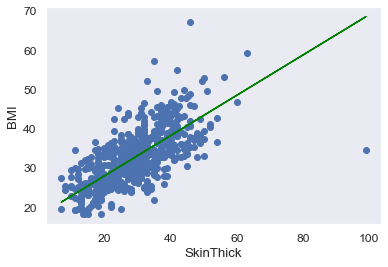

time: 169 ms


In [13]:
coeff = np.polyfit(df.SkinThick, df.BMI, deg=1)
trendline = np.poly1d(coeff)
BMI = trendline(df.SkinThick)
plt.scatter(df.SkinThick, df.BMI);
plt.plot(df.SkinThick, BMI, color='green');
plt.xlabel('SkinThick');
plt.ylabel('BMI');


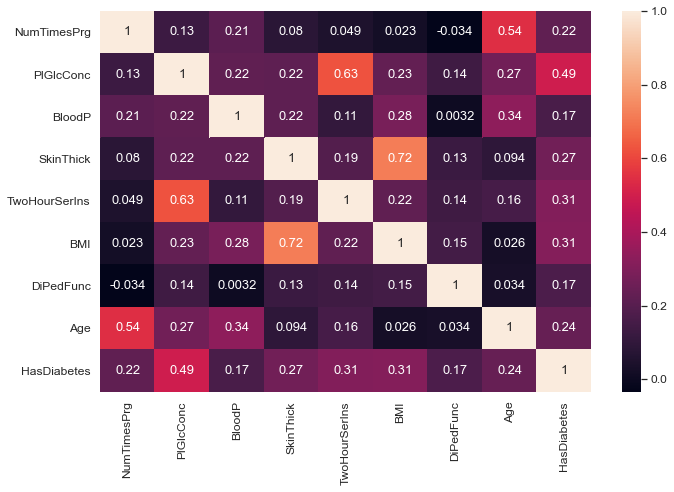

time: 568 ms


In [14]:
fig, axes = plt.subplots(1, 1, figsize=(11,7))
sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize': 13});


- <span style="color:blue"> Nhận xét:
    - Dễ nhận thấy hệ số tương quan giữa các cột được xử lý tăng nhẹ so với khi chưa xử lý

## Normalize Data 

One of the most important data transformations we need to apply is the features scaling. Basically, most of the machine learning algorithms don't work very well if the features have a different set of values. In our case, for example, the Age ranges from 20 to 80 years old, while the number of times a patient has been pregnant ranges from 0 to 17. For this reason, we need to apply a proper transformation.

### 8. Execute Data Standardization using data zero mean and unit variance (don't forget to remove ground truth column before scaling).

In [15]:
#TO DO:
from sklearn import preprocessing
X = df.drop('HasDiabetes', axis=1)
X = preprocessing.scale(X)
X

array([[ 0.63994726,  0.86656834, -0.02608105, ...,  0.16636609,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20352936, -0.52117462, ..., -0.85228857,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.01662262, -0.68620581, ..., -1.33251148,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.02061639, -0.02608105, ..., -0.91049741,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14367708, -1.01626819, ..., -0.34296124,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94065981, -0.19111224, ..., -0.29930462,
        -0.47378505, -0.87137393]])

time: 6.98 ms


# Splitting the Dataset

Now that we have transformed the data, we need to split the dataset into two parts: a training dataset and a test dataset. Splitting the dataset is a very important step for supervised machine learning models. Basically, we are going to use the first part to train the model (ignoring the column with the pre-assigned label), then we use the trained model to make predictions on new data (which is the test dataset, not part of the training set) and compare the predicted value with the pre-assigned label.

### 9. Split the dataset into 80/20 using the stratified technique and random_state=7.

In [16]:
#TO DO:
from sklearn.model_selection import train_test_split
y = df['HasDiabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=7)
X_train[:5]


array([[ 0.63994726,  0.83370965,  0.63404371, -0.33700911,  0.29212727,
        -0.4302745 , -0.88754131,  1.4259954 ],
       [ 0.93691372, -0.80922504,  0.30398133,  0.34789985, -0.59645571,
         1.22867737,  1.20540093, -0.10558415],
       [ 0.63994726,  0.07795969, -0.02608105, -0.54464013, -0.06899418,
        -0.70676648, -0.31371876, -0.36084741],
       [ 3.01567896,  1.75375307, -0.851237  ,  0.14050067,  0.73175337,
         0.16636609, -0.78485727,  0.40494237],
       [ 0.93691372,  1.26087267, -1.51136176,  0.34789985,  0.3297435 ,
        -0.28475241,  0.35070735,  0.49003012]])

time: 90.4 ms


# Additional Question: 
### Why should we perform data normalization and data splitting before the training step?
Type your answer in the cell bellow as the markdown format.

- Chúng ta cần tiêu chuẩn hóa dữ liệu nhằm mục đích:
    - Đưa các biến về cùng một dải đo nhằm triệt tiêu sự thiên vị do sự khác nhau về phạm vi của các biến đối với một số tính toán trong mô hình, ví dụ như tính khoảng cách trong mô hình KNN, hay tính tích vô hướng trong mô hình SVM. Nếu không chuẩn hóa thì biến có phạm vi lớn hơn sẽ chiếm ưu thế hơn trong kết quả tính toán
    - Một số giải thuật cần làm việc trên dữ liệu đã được chuẩn hóa nhằm tăng tốc độ hội tụ, ví dụ như gradient descent
- Chúng ta cần phân tách dữ liệu nhằm mục đích:
    - Tách tập dữ liệu thành hai gồm tập dữ liệu đào tạo(train data) dùng để xây dựng mô hình và tập dữ liệu dùng cho kiểm tra(test data) nhằm kiểm tra đánh giá hiệu suất của mô hình. Tập dữ liệu kiểm tra đại diện cho dữ liệu chưa biết trong thế giới thực, khi lượng dữ liệu càng lớn thì tập kiểm tra càng phản ánh đầy đủ các khả năng có thể xảy ra trong thế giới thực
    

### TO DO:


### 10. Print out the proportion of positive/total women who have diabetes on the full dataset, training dataset, and testing dataset.

In [17]:
#TO DO:
# the proportion on the full dataset
y_Yes = y.value_counts()[1]
print(y_Yes/len(y))
# the proportion on the training dataset
y_training_Yes = y_train.value_counts()[1]
print(y_training_Yes/len(y_train))
# the proportion on the testing dataset
y_testing_Yes = y_test.value_counts()[1]
print(y_testing_Yes/len(y_test))


0.3489583333333333
0.3485342019543974
0.35064935064935066
time: 16.9 ms


# Classification 

Now, it is your turn, use the training set to build an accurate model. Then use the test set to report the accuracy of the model.

You should use the following algorithms:
- K Nearest Neighbor(KNN)
- Decision Tree
- Support Vector Machine
- Logistic Regression
- Soft voting
- Hard voting



**__ Notes:__**

- You must try to **FINE TUNE AT LEAST 3 PARAMETERS** on each algorithm, except on soft voting and hard voting.
- You can go above and change the pre-processing, feature selection, feature extraction, and so on, to make a better model.
- You should use either scikit-learn, Scipy or Numpy libraries for developing the classification algorithms.
- You should include the code of the algorithm in the following cells.

# Import Evaluation Metrices

In [18]:
from sklearn.metrics import jaccard_similarity_score, f1_score

time: 997 µs


In [19]:
# a dictionary for keeping all scores of the classifiers
f1_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0},
             'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 
                  'test':{'KNN': 0, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}


time: 999 µs


# K Nearest Neighbor(KNN)
### 11. Finetune at least 3 parameters to get the KNN model with best accuracy. Then, print out the KNN model's parameters with the best accuracy(best estimator).
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning:** You should not use the test data for finding the best parameters.

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


time: 151 ms


In [21]:
#TO DO:
grid_params = {'n_neighbors': np.arange(1, 20),
               'p': [1, 2, 3, 4, 5],
               'weights': ['uniform', 'distance'],
               #'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }

KNN_gs = GridSearchCV(
         KNeighborsClassifier(),
         grid_params,
         cv=5,
         #verbose=0,
         n_jobs=-1,
         )
               
KNN_gs.fit(X_train, y_train)
# save best model 
KNN_best = KNN_gs.best_estimator_


time: 3.98 s


In [22]:
print(KNN_gs.best_score_)
print(KNN_gs.best_params_)
print(KNN_best)


0.7605224576835933
{'n_neighbors': 16, 'p': 3, 'weights': 'uniform'}
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=16, p=3,
                     weights='uniform')
time: 2.96 ms


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in KNN algorithm.
Type your answer in the cell bellow as markdown format.

- Ý nghĩa các tham số:
    - __n_neighbors__: Số lượng điểm gần nhất dùng để bỏ phiếu xác định phân lớp cho điểm cần truy vấn, nếu *n_neighbors* quá bé(ví dụ bằng 1) kết quả có thể bị ảnh bởi nhiễu dẫn đến overfitting, khi *n_neighbors* quá lớn có thể dẫn đến underfitting vì sự phân loại trở nên đơn giản
    - __p__: các công thức để tính khoảng cách giữa điểm cần truy vấn đến tất cả các điểm trong tập dữ liệu, công thức tổng quát là khoảng cách Minkowski
    - __weights__: Phương pháp để bỏ phiếu từ k điểm gần nhất(*n_neighbors*) để xác định phân lớp cho điểm cần truy vấn. Nếu *weights = uniform* thì bỏ phiếu chỉ quan tâm đến đa số, điểm truy vấn sẽ có phân lớp là phân lớp xuất hiện nhiều nhất trong k điểm. Nếu *weights = distance* thì những điểm gần với điểm truy vấn hơn sẽ được ưu tiên hơn, phân lớp của những điểm này sẽ được tính trọng số lớn hơn

### TO DO:


### 12. Run the prediction on KNN models on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.  
**Requirement**: F1 score on test data must be higher than **0.6**, Jaccard similarity score must be higher than **0.75**.

In [23]:
#TO DO:
yhat_train = KNN_best.predict(X_train)
yhat_test = KNN_best.predict(X_test)

train_f1_score = f1_score(y_train, yhat_train)
train_jaccard_score = jaccard_similarity_score(y_train, yhat_train)

test_f1_score = f1_score(y_test, yhat_test)
test_jaccard_score = jaccard_similarity_score(y_test, yhat_test)

f1_scores['train']['KNN'] = train_f1_score
f1_scores['test']['KNN'] = test_f1_score

jaccard_scores['train']['KNN'] = train_jaccard_score
jaccard_scores['test']['KNN'] = test_jaccard_score

print('f1_scores =', f1_scores) 
print('jaccard_scores =', jaccard_scores) 


f1_scores = {'train': {'KNN': 0.641711229946524, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7058823529411765, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train': {'KNN': 0.7817589576547231, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.8051948051948052, 'DT': 0, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
time: 132 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Decision Tree

### 13, 14. Perform task 11 and 12 on the DT model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.6**, the Jaccard similarity score must be higher than **0.73**.

In [24]:
from sklearn.tree import DecisionTreeClassifier

time: 74.3 ms


In [25]:
#TO DO:
grid_params = {'criterion': ['gini', 'entropy'],
               'max_depth': [2, 3, 4, 5, 6, 7], #np.arange(1, 5),
               'min_samples_split': np.arange(2, 30),
               'min_samples_leaf': np.arange(1, 10),
              }

DT_gs = GridSearchCV(
        DecisionTreeClassifier(),
        grid_params,
        cv=5,
        #verbose=0,
        n_jobs=-1,
        )
               
DT_gs.fit(X_train, y_train)
# save best model
DT_best = DT_gs.best_estimator_
               

time: 8.24 s


In [26]:
print(DT_gs.best_score_)
print(DT_gs.best_params_)
print(DT_best)


0.7441689990670397
{'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 9, 'min_samples_split': 23}
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=23,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
time: 998 µs


### Plot tree

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


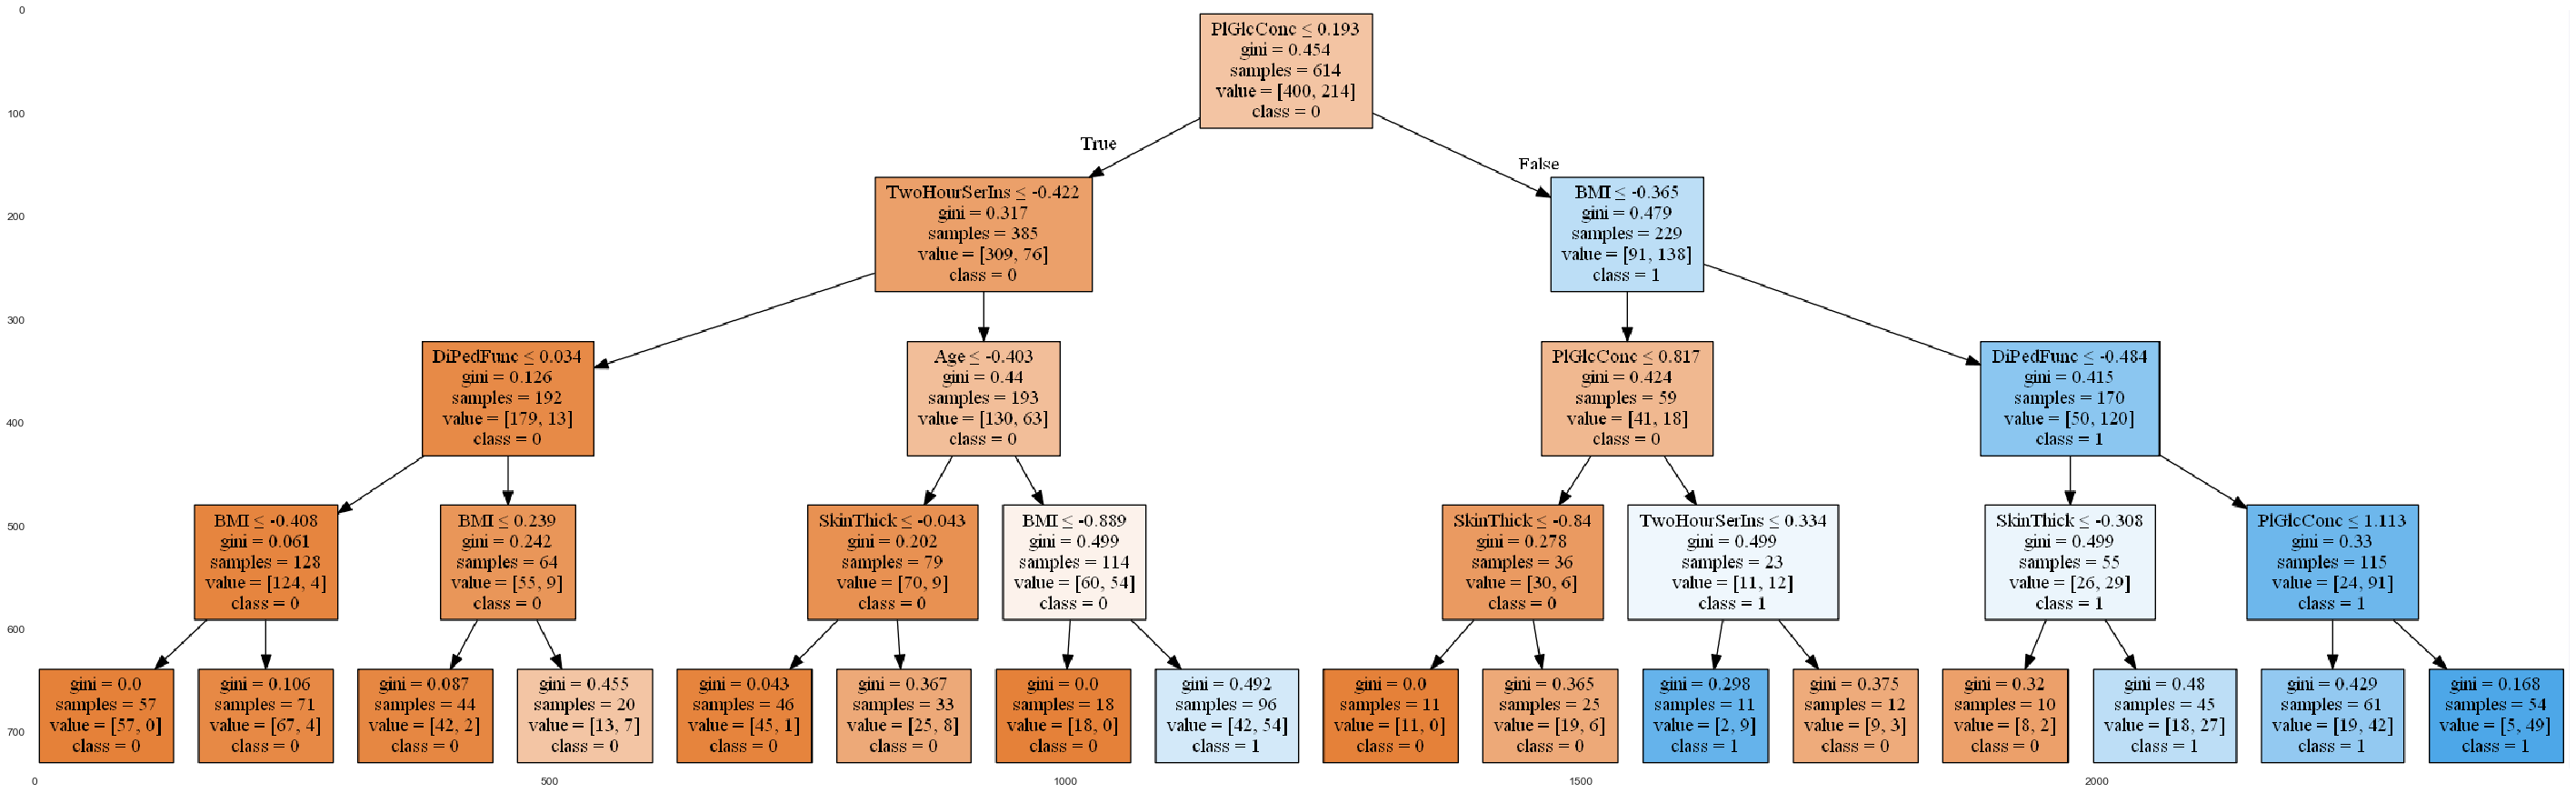

time: 1.33 s


In [27]:
from sklearn.externals.six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree

dot_data = StringIO()
filename = "tree.png"
featureNames = df.columns[0:8]
class_names = list(map(str, np.unique(y_train)))
out=tree.export_graphviz(DT_best, feature_names=featureNames, out_file=dot_data, class_names=class_names,
                         filled=True, special_characters=True,rotate=False)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize=(50, 30))
plt.imshow(img, interpolation='nearest');


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in DT algorithm.
Type your answer in the cell bellow as the markdown format.

- Ý nghĩa các tham số:
    - __criterion__: Các phương pháp đo lường để xác định điểm phân tách dữ liệu tốt nhất (tách node và leaf). Ý nghĩa 2 phương pháp là như nhau chỉ khác nhau ở công thức tính toán. Điểm phân tách dữ liệu được chọn là điểm mà tại đó sau khi tách chỉ số gini hoặc entropy là bé nhất, nghĩa là các nhóm được tách cho ta nhiều thông tin nhất, sự thuần khiết trong mỗi nhóm là cao nhất.
    - __max_depth__: Độ sâu của cây, *max_depth* càng lớn thì sự phân chia càng chi tiết, *max_depth* cao nhất đạt được khi mỗi một mẫu trong dữ liệu thuộc về một lá  
    - __min_samples_split__: giới hạn số mẫu dữ liệu bé nhất mà thuật toán chia tách còn hoạt động, 
    - __min_samples_leaf__: giới hạn số mẫu dữ liệu bé nhất có thể trong một lá 
    
    - max_depth, min_samples_split và min_samples_leaf có liên quan đến nhau, max_depth thực tế đạt được cao hơn khi 2 thông số còn lại thấp hơn, 3 tham số này dùng để điều chỉnh mức độ phân chia chi tiết của cây, tránh overfitting và đạt được độ chính xác mong muốn

### Prediction and calculate result

In [28]:
# predict and get score 
yhat_train = DT_best.predict(X_train)
yhat_test = DT_best.predict(X_test)

train_f1_score = f1_score(y_train, yhat_train)
train_jaccard_score = jaccard_similarity_score(y_train, yhat_train)

test_f1_score = f1_score(y_test, yhat_test)
test_jaccard_score = jaccard_similarity_score(y_test, yhat_test)

# save result to dict
f1_scores['train']['DT'] = train_f1_score
f1_scores['test']['DT'] = test_f1_score

jaccard_scores['train']['DT'] = train_jaccard_score
jaccard_scores['test']['DT'] = test_jaccard_score

print('f1_scores =', f1_scores) 
print('jaccard_scores =', jaccard_scores) 


f1_scores = {'train': {'KNN': 0.641711229946524, 'DT': 0.7525987525987526, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7058823529411765, 'DT': 0.7037037037037037, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train': {'KNN': 0.7817589576547231, 'DT': 0.8061889250814332, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.8051948051948052, 'DT': 0.7922077922077922, 'SVM': 0, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
time: 6.98 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Support Vector Machine

### 15, 16. Perform task 11 and 12 on SVM models.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.62**, Jaccard similarity score must be higher than **0.75**.

In [29]:
from sklearn.svm import SVC

time: 997 µs


In [30]:
#TO DO:

grid_params = {'kernel': ['sigmoid', 'rbf', 'linear'], #'poly'],
               'C': [0.01, 0.1, 1, 10, 100], # change width of margin
               #'degree': [2], # for only poly
               'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10], # not for linear, 
               'probability': [True],
                #'coef0': [0, 1] # for poly and sigmoid
              }  
SVC_gs = GridSearchCV(
         SVC(),
         grid_params,
         cv=5,
         #verbose=0,
         n_jobs=-1,
         )
               
SVC_gs.fit(X_train, y_train)
# save best model
SVC_best = SVC_gs.best_estimator_


time: 9 s


### Test my kernel 

In [31]:
def my_kernel(gamma):
               
    def kernel(X, Z):
        MX = []
        for i in range(len(X)):
            row = []
            for j in range(len(X)):
                ED = np.linalg.norm(X[i] - X[j])
                K_ED = np.exp(-gamma*ED)
                row.append(K_ED)
            MX.append(row)
        MX = np.array(MX)
        #print(MX)
        return MX
    return kernel

clf = SVC(kernel=my_kernel(gamma=1), C=1)
clf.fit(X_train, y_train)
clf.score(X_train, y_train)


0.9609120521172638

time: 5.64 s


In [32]:
yhat_train = clf.predict(X_train)
train_f1_score = f1_score(y_train, yhat_train)
train_jaccard_score = jaccard_similarity_score(y_train, yhat_train)
print(train_f1_score)
print(train_jaccard_score)


0.9420289855072463
0.9609120521172638
time: 3.32 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### End test my kernel 

In [33]:
print(SVC_gs.best_score_)
print(SVC_gs.best_params_)
print(SVC_best)


0.7670131947221112
{'C': 0.1, 'gamma': 0.0001, 'kernel': 'linear', 'probability': True}
SVC(C=0.1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0001, kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)
time: 2 ms


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in SVM algorithm.
Type your answer in the cell bellow as the markdown format.

- Ý nghĩa các tham số:
    - __kernel__: Các hàm để biến đổi dữ liệu sang không gian mới sao cho trong không gian mới dữ liệu của các lớp là phân biệt tuyến tính  
    - __C__: Như một hệ số điều chỉnh độ rộng của margin, C càng lớn thì margin càng bé, mô hình sẽ gần giống hard margin, margin càng bé thì sự phân biệt của hai class bé đi, xác suất để một điểm trong tập test bị phân loại sai khi nó nằm trong vùng margin này là cao hơn. Nói cách khác C càng lớn bề mặt phân tách càng cố gắng đi qua tất cả các điểm dữ liệu, điều này dễ gây ra overfitting. Mục tiêu của bài toán là tìm được margin lớn nhất nhưng tối thiểu số điểm bị phân loại sai sao cho độ chính xác là cao nhất
    - __gamma__: Hệ số kernel dùng cho các hàm rbf, poly and sigmoid
    - __probability__: Thiết lập bằng *True* để chuyển kết quả dự đoán thành xác suất mục đích sử dụng cho mô hình Ensemble soft votting 
     

### Prediction and calculate result

In [34]:
# predict and get score 
yhat_train = SVC_best.predict(X_train)
yhat_test = SVC_best.predict(X_test)

train_f1_score = f1_score(y_train, yhat_train)
train_jaccard_score = jaccard_similarity_score(y_train, yhat_train)

test_f1_score = f1_score(y_test, yhat_test)
test_jaccard_score = jaccard_similarity_score(y_test, yhat_test)

# save result to dict
f1_scores['train']['SVM'] = train_f1_score
f1_scores['test']['SVM'] = test_f1_score

jaccard_scores['train']['SVM'] = train_jaccard_score
jaccard_scores['test']['SVM'] = test_jaccard_score

print('f1_scores =', f1_scores) 
print('jaccard_scores =', jaccard_scores) 


f1_scores = {'train': {'KNN': 0.641711229946524, 'DT': 0.7525987525987526, 'SVM': 0.6141304347826086, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7058823529411765, 'DT': 0.7037037037037037, 'SVM': 0.631578947368421, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train': {'KNN': 0.7817589576547231, 'DT': 0.8061889250814332, 'SVM': 0.7687296416938111, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.8051948051948052, 'DT': 0.7922077922077922, 'SVM': 0.7727272727272727, 'LR': 0, 'EN_HARD': 0, 'EN_SOFT': 0}}
time: 11 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Logistic Regression

### 17, 18. Perform task 11 and 12 on Logistic Regression model.

Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data has to higher than **0.63**, Jaccard similarity score must be higher than **0.75**.

In [35]:
from sklearn.linear_model import LogisticRegression

time: 0 ns


In [36]:
#TO DO:
grid_params = {'penalty': ['l1', 'l2', 'elasticnet', 'none'],
               'C': [0.01, 0.1, 1, 10],
               'l1_ratio': np.arange(0.1, 1, step=0.1),
               'solver': ['liblinear', 'sag', 'lbfgs', 'newton-cg', 'saga'], # Algorithms
               'max_iter': [100, 1000, 2500, 5000],
              }  
LR_gs = GridSearchCV(
        LogisticRegression(),
        grid_params,
        cv=5,
        #verbose=0,
        n_jobs=-1,
        )
               
LR_gs.fit(X_train, y_train)
#save best model
LR_best = LR_gs.best_estimator_
               

time: 9.52 s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


In [37]:
print(LR_gs.best_score_)
print(LR_gs.best_params_)
print(LR_best)


0.7605357856857257
{'C': 1, 'l1_ratio': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'sag'}
LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.1, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)
time: 996 µs


# Additional Question: 
### Interpret and explain the parameters you have chosen to fine tune in LR algorithm.
Type your answer in the cell bellow as the markdown format.

- Ý nghĩa các tham số:
    - __penalty__: Các kỹ thuật chính quy hóa được chọn để kiểm soát vấn đề overfitting, mục đích là làm giảm sự khác biệt giữa các hệ số trong mô hình.
    - __C__: Hệ số điều chỉnh độ mạnh của chính quy, C càng nhỏ thì độ mạnh của chính quy hóa càng tăng, C=1/lambda, với lambda là hệ số chính quy
    - __l1_ratio__: Hệ số điều chỉnh tỉ lệ giữa lượng chính quy L1 và L2 trong kỹ thuật chính quy hỗn hợp elasticnet. L1_regularisation = l1_ratio * 1./C, L2_regularisation = (1-l1_ratio) * 1./C
    - __solver__: Các giải thuật được sử dụng để fit dữ liệu
    - __max_iter__: Số vòng lặp lớn nhất để các giải thuật (solver) hội tụ

### Prediction and calculate result

In [38]:
# predict and get score 
yhat_train = LR_best.predict(X_train)
yhat_test = LR_best.predict(X_test)

train_f1_score = f1_score(y_train, yhat_train)
train_jaccard_score = jaccard_similarity_score(y_train, yhat_train)

test_f1_score = f1_score(y_test, yhat_test)
test_jaccard_score = jaccard_similarity_score(y_test, yhat_test)

# save result to dict
f1_scores['train']['LR'] = train_f1_score
f1_scores['test']['LR'] = test_f1_score

jaccard_scores['train']['LR'] = train_jaccard_score
jaccard_scores['test']['LR'] = test_jaccard_score

print('f1_scores =', f1_scores) 
print('jaccard_scores =', jaccard_scores) 


f1_scores = {'train': {'KNN': 0.641711229946524, 'DT': 0.7525987525987526, 'SVM': 0.6141304347826086, 'LR': 0.619047619047619, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.7058823529411765, 'DT': 0.7037037037037037, 'SVM': 0.631578947368421, 'LR': 0.6666666666666667, 'EN_HARD': 0, 'EN_SOFT': 0}}
jaccard_scores = {'train': {'KNN': 0.7817589576547231, 'DT': 0.8061889250814332, 'SVM': 0.7687296416938111, 'LR': 0.7654723127035831, 'EN_HARD': 0, 'EN_SOFT': 0}, 'test': {'KNN': 0.8051948051948052, 'DT': 0.7922077922077922, 'SVM': 0.7727272727272727, 'LR': 0.7792207792207793, 'EN_HARD': 0, 'EN_SOFT': 0}}
time: 6.98 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


# Advanced part (15%  of the total score)

# Ensemble model

### 19. Perform soft voting on the 4 above models (using the same setting for the 4 models as in previous steps.) 
**Hint**: Using VotingClassifier in sklearn.ensemble.

In [39]:
from sklearn.ensemble import VotingClassifier

time: 53.9 ms


In [40]:
#TO DO:
#create a dictionary of our models
estimators = [('KNN', KNN_best), ('DT', DT_best), ('SVM', SVC_best), ('LR', LR_best)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='soft')
ensemble.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=16,
                                                   p=3, weights='uniform')),
                             ('DT',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=4,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decre

time: 37.9 ms


### 20. Run the prediction on the ensembling model using soft voting on training data and test data, then calculate the f1 score and Jaccard similarity score and save it to f1_scores dict and jaccard_scores dict.¶

**Requirement**: F1 score on test data must be higher than **0.66**, Jaccard similarity score must be higher than **0.78**.

In [41]:
#TO DO:
# predict and get score 
yhat_train = ensemble.predict(X_train)
yhat_test = ensemble.predict(X_test)

train_f1_score = f1_score(y_train, yhat_train)
train_jaccard_score = jaccard_similarity_score(y_train, yhat_train)

test_f1_score = f1_score(y_test, yhat_test)
test_jaccard_score = jaccard_similarity_score(y_test, yhat_test)

# save result to dict
f1_scores['train']['EN_SOFT'] = train_f1_score
f1_scores['test']['EN_SOFT'] = test_f1_score

jaccard_scores['train']['EN_SOFT'] = train_jaccard_score
jaccard_scores['test']['EN_SOFT'] = test_jaccard_score

print('f1_scores =', f1_scores) 
print('jaccard_scores =', jaccard_scores) 


f1_scores = {'train': {'KNN': 0.641711229946524, 'DT': 0.7525987525987526, 'SVM': 0.6141304347826086, 'LR': 0.619047619047619, 'EN_HARD': 0, 'EN_SOFT': 0.6632390745501286}, 'test': {'KNN': 0.7058823529411765, 'DT': 0.7037037037037037, 'SVM': 0.631578947368421, 'LR': 0.6666666666666667, 'EN_HARD': 0, 'EN_SOFT': 0.6804123711340206}}
jaccard_scores = {'train': {'KNN': 0.7817589576547231, 'DT': 0.8061889250814332, 'SVM': 0.7687296416938111, 'LR': 0.7654723127035831, 'EN_HARD': 0, 'EN_SOFT': 0.7866449511400652}, 'test': {'KNN': 0.8051948051948052, 'DT': 0.7922077922077922, 'SVM': 0.7727272727272727, 'LR': 0.7792207792207793, 'EN_HARD': 0, 'EN_SOFT': 0.7987012987012987}}
time: 126 ms


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


### 21, 22. Perform task 19 and 20 using hard voting.
Hint: Using GridSearchCV in sklearn.model_selection.

**Warning**: You should not use the test data for finding the best parameters.

**Requirement**: F1 score on test data must be higher than **0.57**, Jaccard similarity score must be higher than **0.73**.

In [42]:
#TO DO:
#create a dictionary of our models
estimators = [('KNN', KNN_best), ('DT', DT_best), ('LR', LR_best)]

#create our voting classifier, inputting our models
ensemble = VotingClassifier(estimators, voting='hard')
ensemble.fit(X_train, y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1501: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  "(penalty={})".format(self.penalty))


VotingClassifier(estimators=[('KNN',
                              KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=16,
                                                   p=3, weights='uniform')),
                             ('DT',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=4,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decre

time: 18.9 ms


### Prediction and calculate result

In [43]:
#TO DO:
# predict and get score 
yhat_train = ensemble.predict(X_train)
yhat_test = ensemble.predict(X_test)

train_f1_score = f1_score(y_train, yhat_train)
train_jaccard_score = jaccard_similarity_score(y_train, yhat_train)

test_f1_score = f1_score(y_test, yhat_test)
test_jaccard_score = jaccard_similarity_score(y_test, yhat_test)

# save result to dict
f1_scores['train']['EN_HARD'] = train_f1_score
f1_scores['test']['EN_HARD'] = test_f1_score

jaccard_scores['train']['EN_HARD'] = train_jaccard_score
jaccard_scores['test']['EN_HARD'] = test_jaccard_score

print('f1_scores =', f1_scores) 
print('jaccard_scores =', jaccard_scores) 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


f1_scores = {'train': {'KNN': 0.641711229946524, 'DT': 0.7525987525987526, 'SVM': 0.6141304347826086, 'LR': 0.619047619047619, 'EN_HARD': 0.6750629722921915, 'EN_SOFT': 0.6632390745501286}, 'test': {'KNN': 0.7058823529411765, 'DT': 0.7037037037037037, 'SVM': 0.631578947368421, 'LR': 0.6666666666666667, 'EN_HARD': 0.7254901960784315, 'EN_SOFT': 0.6804123711340206}}
jaccard_scores = {'train': {'KNN': 0.7817589576547231, 'DT': 0.8061889250814332, 'SVM': 0.7687296416938111, 'LR': 0.7654723127035831, 'EN_HARD': 0.7899022801302932, 'EN_SOFT': 0.7866449511400652}, 'test': {'KNN': 0.8051948051948052, 'DT': 0.7922077922077922, 'SVM': 0.7727272727272727, 'LR': 0.7792207792207793, 'EN_HARD': 0.8181818181818182, 'EN_SOFT': 0.7987012987012987}}
time: 133 ms


# Report
You should be able to report the accuracy of the built model using different evaluation metrics:

| Algorithm          | Jaccard-training | F1-score-training |Jaccard-testing | F1-score-testing |
|--------------------|------------------|-------------------|----------------|------------------|
| KNN                | ?                | ?                 |  ?             |  ?               |
| Decision Tree      | ?                | ?                 |  ?             |  ?               |
| SVM                | ?                | ?                 |  ?             |  ?               |
| Logistic Regression| ?                | ?                 |  ?             |  ?               |
| Hard Voting        | ?                | ?                 |  ?             |  ?               |
| Soft Voting        | ?                | ?                 |  ?             |  ?               |


### 23. Create a data frame that describes the result as exactly as above.

In [44]:
#TO DO:
report_df = pd.DataFrame()
report_df['Algorithm'] = ['KNN', 'Decision Tree', 'SVM', 'Logistic Regression', 'Hard Voting', 'Soft Voting']
report_df['Jaccard-training'] = jaccard_scores['train'].values()
report_df['F1-score-training'] = f1_scores['train'].values()
report_df['Jaccard-testing'] = jaccard_scores['test'].values()
report_df['F1-score-testing'] = f1_scores['test'].values()
report_df_type = report_df.style.set_properties(**{'text-align': 'left'}).hide_index()
report_df_type


Algorithm,Jaccard-training,F1-score-training,Jaccard-testing,F1-score-testing
KNN,0.781759,0.641711,0.805195,0.705882
Decision Tree,0.806189,0.752599,0.792208,0.703704
SVM,0.768730,0.614130,0.772727,0.631579
Logistic Regression,0.765472,0.619048,0.779221,0.666667
Hard Voting,0.789902,0.675063,0.818182,0.725490
Soft Voting,0.786645,0.663239,0.798701,0.680412


time: 331 ms


# Additional Question: 
### Are ensemble methods always better than a single model? If not, explain why?
Type your answer in the cell bellow as the markdown format.
	

### TO DO:


Phương pháp sử dụng nhiều mô hình kết hợp (*Ensemble*) không phải lúc nào cũng luôn luôn tốt hơn khi sử dụng một mô hình. Khi các mô hình tốt như nhau thì có thể điều này đúng vì chúng sẽ hỗ trợ cho nhau. Tuy nhiên khi một mô hình rất tốt mà kết hợp với nhiều mô hình rất yếu thì qua phương pháp bỏ phiếu (*votting*) kết quả của những mô hình yếu này sẽ chiếm ưu thế, do đó kết quả cuối cùng sẽ kém hơn so với trường hợp chỉ sử dụng mô hình rất tốt kia.